NIM : 211351067 <br>
Nama : Innayah Azizah Latifah <br>
Kelas : TIF Pagi A <br>

# Import Dataset Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"innayahazizahl","key":"e7978ef4ade88e325baf3b577209cf3d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d heeraldedhia/groceries-dataset

groceries-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/groceries-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [ ]:
df = pd.read_csv('/content/Groceries_dataset.csv')

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Date'].dtype

dtype('<M8[ns]')

In [ ]:
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.weekday
df['year']=df['Date'].dt.year

In [ ]:
df.head()

,Member_number,Date,itemDescription,month,day,year
0,1808,2015-07-21,tropical fruit,7,1,2015
1,2552,2015-05-01,whole milk,5,4,2015
2,2300,2015-09-19,pip fruit,9,5,2015
3,1187,2015-12-12,other vegetables,12,5,2015
4,3037,2015-01-02,whole milk,1,4,2015


# EDA

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2015-01-21 00:00:00'),
  Text(1, 0, '2015-07-21 00:00:00'),
  Text(2, 0, '2015-11-29 00:00:00'),
  Text(3, 0, '2015-08-08 00:00:00'),
  Text(4, 0, '2015-04-30 00:00:00'),
  Text(5, 0, '2014-08-28 00:00:00'),
  Text(6, 0, '2015-03-26 00:00:00'),
  Text(7, 0, '2015-09-30 00:00:00'),
  Text(8, 0, '2015-06-19 00:00:00'),
  Text(9, 0, '2015-05-16 00:00:00')])

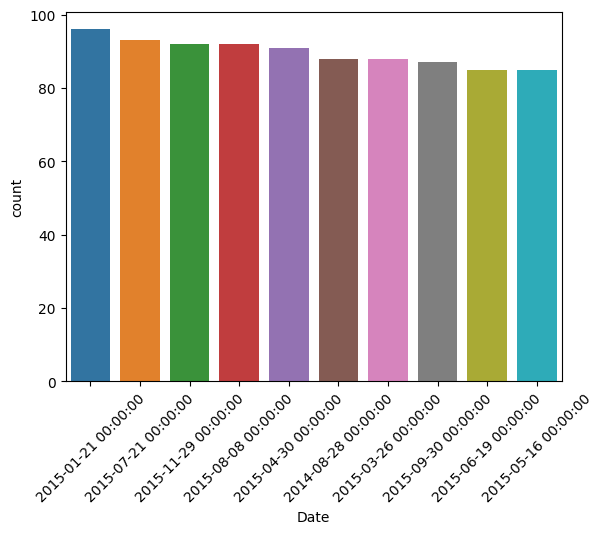

In [ ]:
sns.countplot(x = 'Date', data = df, order = df['Date'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)

Dari grafik diatas menunjukkan bahwa data penjualan terbanyak pada tanggal 2015-01-21

<Axes: xlabel='itemDescription', ylabel='count'>

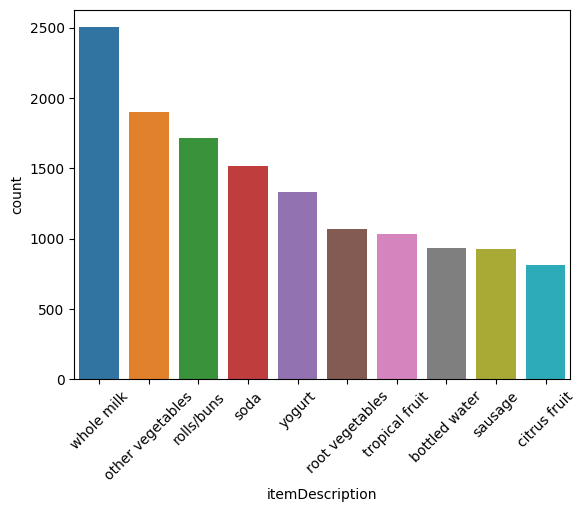

In [ ]:
plt.xticks(rotation=45)
sns.countplot(x = 'itemDescription', data = df, order = df['itemDescription'].value_counts().iloc[:10].index)

Dari grafik diatas menunjukkan bahwa data penjualan terbanyak adalah pada item whole milk

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '3'),
  Text(1, 0, '2'),
  Text(2, 0, '6'),
  Text(3, 0, '1'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '0')])

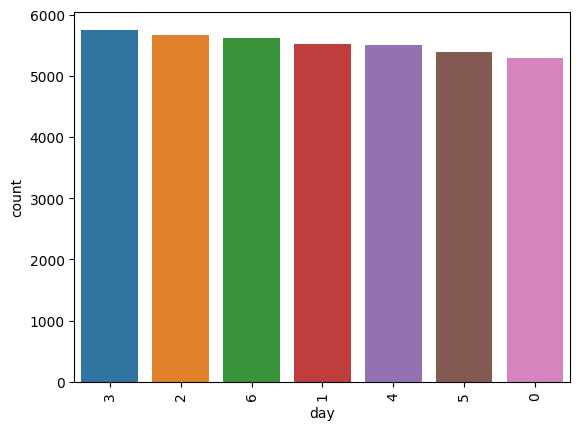

In [ ]:
sns.countplot(x = 'day', data = df, order = df['day'].value_counts().iloc[:25].index)
plt.xticks(rotation=90)

Dari grafik diatas menunjukkan bhawa data penjualan terbanyakk adalah pada hari kamis

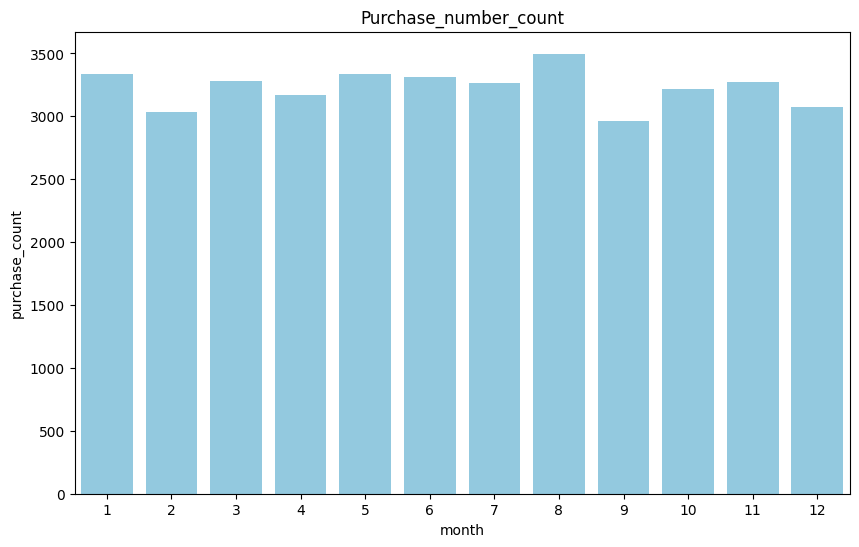

In [ ]:
df['Month'] = df['Date'].dt.month
monthly_purchase_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_purchase_counts.index, y=monthly_purchase_counts.values, color='skyblue')
plt.xlabel('month')
plt.ylabel('purchase_count')
plt.title('Purchase_number_count')
plt.show()

Dari grafik diatas menunjukkan bahwa data penjualan terbanyak adalah pada bulan agustus

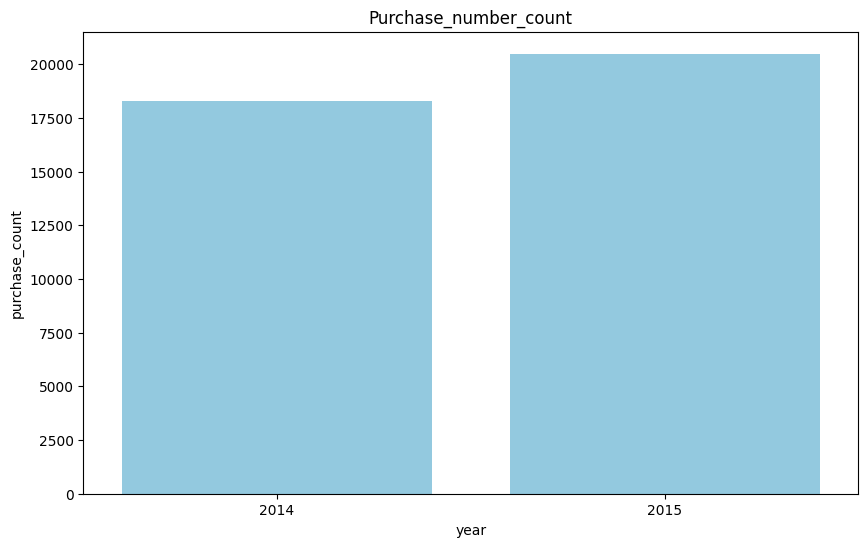

In [ ]:
df['year'] = df['Date'].dt.year
year_purchase_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=year_purchase_counts.index, y=year_purchase_counts.values, color='skyblue')
plt.xlabel('year')
plt.ylabel('purchase_count')
plt.title('Purchase_number_count')
plt.show()

Dari grafik diatas menunjukkan bahwa penjualan terbanyak adalah pada tahun 2015

# Data Preparation

In [ ]:
df['itemDescription'] = df['itemDescription'].apply(lambda item: item.lower())
df['itemDescription'] = df['itemDescription'].apply(lambda item: item.strip())

In [ ]:
df = df[['Member_number','itemDescription']].copy()
df.head(10)

,Member_number,itemDescription
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk
5,4941,rolls/buns
6,4501,other vegetables
7,3803,pot plants
8,2762,whole milk
9,4119,tropical fruit


In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
import warnings
warnings.filterwarnings("ignore")
item_count = df.groupby(['Member_number','itemDescription'])["itemDescription"].count().reset_index(name="Count")
item_count.head(10)

,Member_number,itemDescription,Count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
5,1000,salty snack,1
6,1000,sausage,2
7,1000,semi-finished bread,1
8,1000,soda,1
9,1000,whole milk,2


In [ ]:
item_count_pivot = item_count.pivot_table(index='Member_number', columns= 'itemDescription', values = 'Count', aggfunc = 'sum').fillna(0)
print("Ukuran Dataset", item_count_pivot.shape)
item_count_pivot.head(5)

Ukuran Dataset (3898, 167)


itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [ ]:
item_count_pivot = item_count_pivot.astype('int32')
item_count_pivot.head()

itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [ ]:
def encode(x):
  if x <=0:
    return 0
  elif x >= 0:
    return 1

item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
print("Ukuran Dataset", item_count_pivot.shape)
print("Jumlah Transaksi", item_count_pivot.shape[0])
print("Jumlah Item", item_count_pivot.shape[1])

Ukuran Dataset (3898, 167)
Jumlah Transaksi 3898
Jumlah Item 167


# Modelling

In [ ]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values('support', ascending=False).head(10)

,support,itemsets
113,0.458184,(whole milk)
68,0.376603,(other vegetables)
83,0.349666,(rolls/buns)
93,0.313494,(soda)
114,0.282966,(yogurt)
105,0.233710,(tropical fruit)
84,0.230631,(root vegetables)
5,0.213699,(bottled water)
88,0.206003,(sausage)
1038,0.191380,"(whole milk, other vegetables)"


In [ ]:
metric ="lift"
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[['antecedents','consequents','support','confidence','lift']]
rules.sort_values('confidence', ascending=False,inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
6937,"(meat, domestic eggs)",(whole milk),0.010262,0.784314,1.711789
5625,"(chocolate, fruit/vegetable juice)",(whole milk),0.010775,0.750000,1.636898
15143,"(bottled water, rolls/buns, yogurt, other vege...",(whole milk),0.010518,0.745455,1.626978
11619,"(bottled water, pip fruit, yogurt)",(whole milk),0.010262,0.740741,1.616689
11983,"(rolls/buns, yogurt, brown bread)",(whole milk),0.012827,0.735294,1.604802
11115,"(bottled water, brown bread, other vegetables)",(whole milk),0.012057,0.723077,1.578138
11086,"(yogurt, bottled beer, rolls/buns)",(whole milk),0.013853,0.720000,1.571422
12794,"(soda, yogurt, curd)",(whole milk),0.010775,0.711864,1.553666
15203,"(rolls/buns, yogurt, other vegetables, shoppin...",(whole milk),0.010005,0.709091,1.547613
14333,"(pip fruit, yogurt, pastry)",(whole milk),0.010518,0.706897,1.542823


# Kesimpulan

Dengan ini kita dapat menarik kesimpulan bahwa supermarket ini dapat menerapkan diskon atau paket pembelian untuk produk whole milk, telur kampung, dan daging pada hari Kamis disekitar bulan Agustus